This script shows you how to sample square matrices with entries following various probability distributions (e.g., continous uniform, normal, discrete uniform) and view the distributions of the determinant function on such matrices.  Can you formulate some conjectures about the distributions arising from taking the determinant of matrices from these families?  Can you prove any of your conjectures?  Can you bound the determinant if the coefficients are just 0 and 1? What possible values occur from determinants of such matrices?

In [8]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [3]:
low  = -1.0
high = 1.0
n    = 2 # Change to 1, 3, 4, 10
size = (n,n)
N    = 10000

In [4]:
dets = [np.linalg.det(np.random.uniform(low=low, high=high, size=size)) for _ in range(N)]

# Or if you are in the mood for normally distributed entries. 
# mu, sigma = 0.0, 1.0
# dets = [np.linalg.det(np.random.normal(mu, sigma, size=size)) for _ in range(N)]

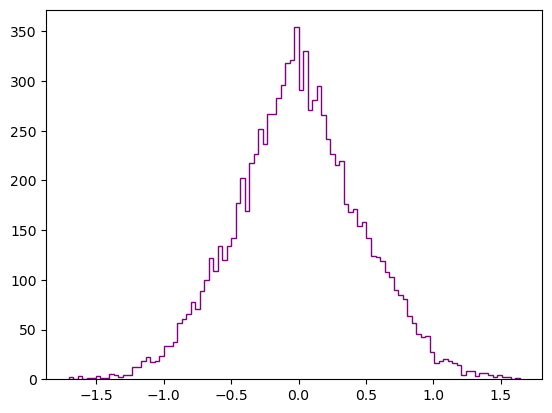

In [5]:
# Ad hoc way of picking the number of bins. 
counts, bins = np.histogram(dets, bins=math.floor(math.sqrt(N)))
plt.stairs(counts, bins, color='purple')

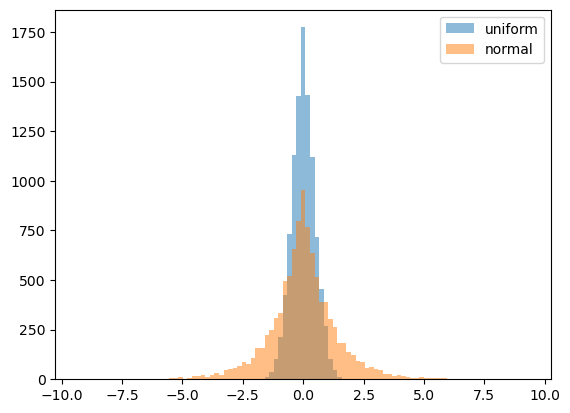

In [6]:
# Compare the determinant distributions for uniformally vs. normaly distributed coeffcients.

mu, sigma = 0.0, 1.0
uniform   = [np.linalg.det(np.random.uniform(low=low, high=high, size=size)) for _ in range(N)]
normal    = [np.linalg.det(np.random.normal(mu, sigma, size=size))           for _ in range(N)]

MAX  = max([abs(x) for x in uniform]+[abs(x) for x in normal])
bins = np.linspace(-1*MAX, MAX, math.floor(math.sqrt(N)))

pyplot.hist(uniform, bins, alpha=0.5,label='uniform')
pyplot.hist(normal,  bins, alpha=0.5, label='normal')
pyplot.legend(loc='upper right')
pyplot.show()

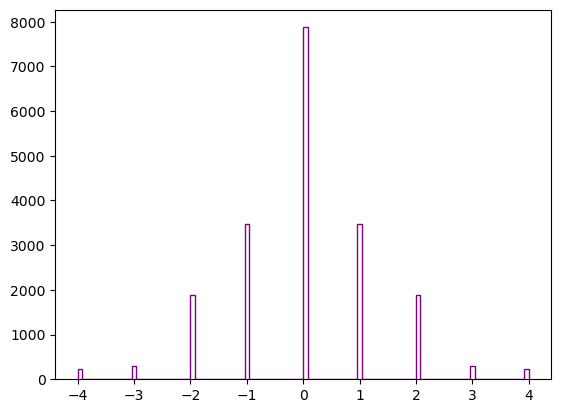

In [7]:
# Distribution of determinants for (-1,0,1)-matrices.
# This terribly inefficient code generates all such matrices of a given size. 

# You can save a ton of space by generating the matrices one by one
# and just storing a count of the determinants.  

# Generates all length n arrays with entries from nums
def repeat(nums, k):
    if k == 0: return []
    if k == 1: return [[x] for x in nums]
    res = []
    for x in nums:
        for y in repeat(nums, k-1):
            res.append([x] + y)
    return res
# Generate all n x n matrices with entries from entries.
def generateMatrices(entries, n):
    rows = repeat(entries, n*n)
    res = []
    for row in rows:
        A = np.array(row).reshape((n,n))
        res.append(A)
    return res

n = 3 #2
entries = [0, 1, -1]
dets = [np.linalg.det(A) for A in generateMatrices(entries, n)]
counts, bins = np.histogram(dets, bins=math.floor(math.sqrt(N)))
plt.stairs(counts, bins, color='purple')

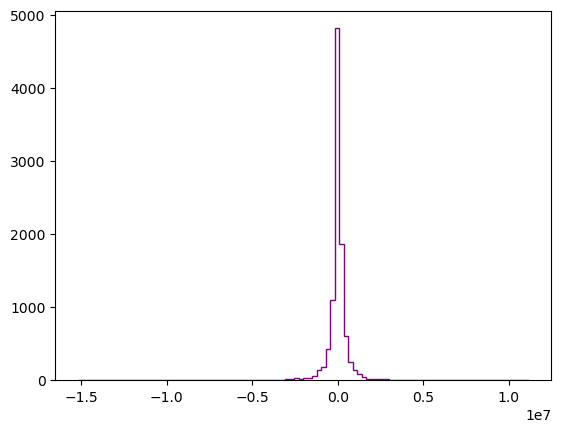

In [23]:
# Let's try just sampling rather than computing the distribution on the nose.
# This lets us look at much larger matrices.  

def getRandomSquareMatrix(entries, size):
    return np.array(random.choices(entries,k=size*size)).reshape((size,size))
    
n = 25
entries = [0, 1]
sampleSize = 10000

dets = [np.linalg.det(getRandomSquareMatrix(entries,n)) for _ in range(sampleSize)]
counts, bins = np.histogram(dets, bins=math.floor(math.sqrt(N)))
plt.stairs(counts, bins, color='purple')